# Support Vector Machine
### Import Data

In [2]:
import kagglehub
path = kagglehub.dataset_download("mansoordaku/ckdisease", path="kidney_disease.csv")

print("Dataset Path: ", path)

C:\Users\mariu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset Path:  C:\Users\mariu\.cache\kagglehub\datasets\mansoordaku\ckdisease\versions\1\kidney_disease.csv


In [3]:
import pandas as pd

df = pd.read_csv(path)

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### Preprocessing
As we could observe there is preprocessing need to be done before actual work.
- drop "id" colum
- apply label encoding
- remove unwanted characters
- solve problems with missing values (NaN)

In [6]:
# first let's drop the "id" column
df = df.drop("id", axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# applying label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

list_of_columns = ["classification", "rbc", "pc", "pcc", "ba", "bgr", "htn", "dm", "cad", "appet", "pe", "ane"]
for column_name in list_of_columns:
    df[column_name] = le.fit_transform(df[column_name])

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,48,...,44,7800,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,146,...,38,6000,NaN,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,140,...,31,7500,NaN,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,44,...,32,6700,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,33,...,35,7300,4.6,0,3,1,0,0,0,0


The code below is to remove unexpected characters that were discovered during training.

In [8]:
import numpy as np

df = df.replace('\t?', np.nan)
df = df.replace('	?', np.nan)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,48,...,44,7800,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,146,...,38,6000,NaN,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,140,...,31,7500,NaN,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,44,...,32,6700,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,33,...,35,7300,4.6,0,3,1,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    int64  
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    object 
 16  wc              294 non-null    object 
 17  rc              269 non-null    obj

As it can be seen there are still some non-numeric features [pcv, wc, rc]

In [10]:
# convert the object types into numeric ones
list_to_convert = ["pcv","wc", "rc"]

for column_name in list_to_convert:
    df[column_name] = pd.to_numeric(df[column_name])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    int64  
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [11]:

# for repair the missing values I will use reparo from Sigmoid
from reparo import CDI

imputer = CDI()
imputer.apply(df, df.columns)

df.isnull().values.any()

np.False_

### Performance of the algorithm influenced by feature scale

> 2. Firstly we will explore how the performance of the algorith is influenced by the feature scale. Train a SVM  >   model on 4 versions of the data set:
 >      1. Initial one.
 >      2. The one passed trought the StandardScaler.
 >      3. The one passed trought the MinMaxScaler.
 >      4. The one passed trought the MaxAbsScaler.

In [12]:
# split the data
from sklearn.model_selection import train_test_split

train_columns = df.drop("classification", axis=1)
target_column = df["classification"]

x, x_test, y, y_test = train_test_split(train_columns, target_column, test_size=0.3, random_state=42)

Train an SVM model on original dataset


In [13]:
from sklearn import svm

clf_plain = svm.LinearSVC()
clf_plain.fit(x, y)

plain_score = clf_plain.score(x_test, y_test)

Train SVM on data passed through __StandardScaler__ first

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_x = standard_scaler.fit_transform(x)

clf_standard = svm.LinearSVC()
clf_standard.fit(standard_x, y)

standard_score = clf_standard.score(x_test.to_numpy(), y_test)

Train SVM on data passed through __MinMaxScaler__

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler_x = min_max_scaler.fit_transform(x)

clf_minmax = svm.LinearSVC()
clf_minmax.fit(min_max_scaler_x, y)

minmax_score = clf_minmax.score(x_test.to_numpy(), y_test)

Train SVM on data passed through __MaxAbsScaler__

In [16]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
max_abs_scaler_x = max_abs_scaler.fit_transform(x)

clf_maxabs = svm.LinearSVC()
clf_maxabs.fit(max_abs_scaler_x, y)

max_abs_score = clf_maxabs.score(x_test.to_numpy(), y_test)

In [17]:
pd.DataFrame({
    "initial" : [plain_score],
    "standard_scale": [standard_score],
    "min_max_scaler": [minmax_score],
    "max_abs_scaler": [max_abs_score],
})

,initial,standard_scale,min_max_scaler,max_abs_scaler
0,0.966667,0.633333,0.633333,0.633333


So as we could observe the applied scale diminished the accuracy score. The reason behind it lays in the data and the way SVM works. For further explanation a data analysis is required. Overall we could conclude that LinearSVC is sensitive to scaling.

### SVMs using different kernels
Usually SVMs use some Kernel to move the data to another space where linear planes that separates the classes. In this task you will have to explore how different kernels are influencing the decision boundary. Create the plots of decision boundary for the following kernels:
1. linear
2. poly
3. rbf
4. sigmoid

<Axes: >

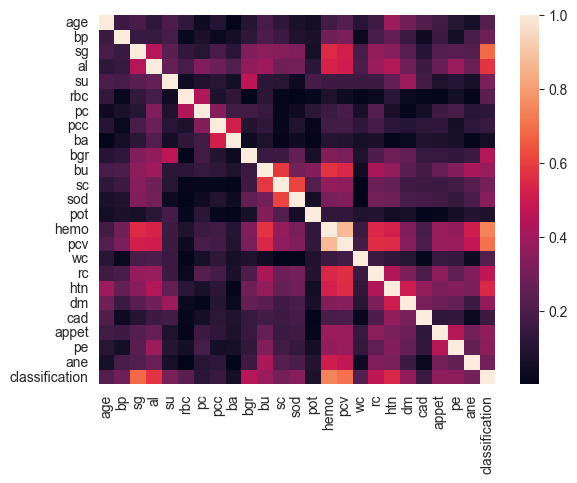

In [18]:
import seaborn as  sns

sns.heatmap(abs(df.corr()))

In [21]:
abs(df.corr()["classification"]).sort_values()[::-1]

classification    1.000000
hemo              0.740397
pcv               0.703006
sg                0.689157
al                0.576838
htn               0.543271
rc                0.469708
bgr               0.443405
bu                0.380763
dm                0.366016
appet             0.359114
pe                0.352622
sod               0.338244
su                0.313074
sc                0.300492
ane               0.293151
bp                0.283692
rbc               0.238042
age               0.222358
wc                0.219575
cad               0.155347
pcc               0.149153
pc                0.114674
pot               0.074796
ba                0.057511
Name: classification, dtype: float64

Pcv and